# Import necessary libraries

In [1]:
#Import all libraries here
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from IPython.display import Image
from numpy import where
from matplotlib import pyplot
from imblearn.under_sampling import NearMiss 
from tabulate import tabulate

In [2]:
#!pip install tabulate
#!pip install -U imbalanced-learn


# Load data set

In [3]:
#Extract the dataset from the zip_file
zf = zipfile.ZipFile('creditcard.zip') 
data_set = pd.read_csv(zf.open('creditcard.csv'))

In [4]:
data_set

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
# it contains 284807 rows and 31 columns 
data_set.shape

(284807, 31)

In [6]:
# show First 5 rows of data_set
data_set.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#The dataset comprises of 284807 transactions, with the features V1, V2, V3, V4, ..., V28 that are obtained using PCA(Principal Component Analysis).
#Time column is the feature that indicates the duration between every transaction occuring and the first transaction.
#Amount column is the feature that contains the transacted amount.
#Class contains either 0 or 1, where 1 is referred to fraud and 0 for no fraud.

In [8]:
#Understand the mean, count, standard_deviation and median(25th, 50th, 75th percentile of dataset)
data_set.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
#Now we need to find the number of fraud transactions and number of genuine transactions

In [10]:
# Zero's are Genuine transations
# One's are Fraudulent transations
genuine = data_set[data_set["Class"] == 0]
fraud = data_set[data_set["Class"] == 1]

In [11]:
print("Number of Genuine transactions = ", genuine.Class.value_counts()[0])
print("Number of fraudulent transactions = ", fraud.Class.value_counts()[1])

Number of Genuine transactions =  284315
Number of fraudulent transactions =  492


In [12]:
# Lets see a sns plot between fraud and genuine transactions

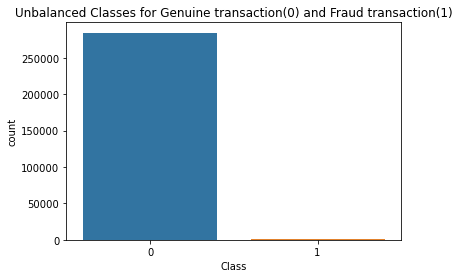

In [13]:
sns.countplot(x = "Class", data = data_set)
plt.title("Unbalanced Classes for Genuine transaction(0) and Fraud transaction(1)")
plt.savefig("Before UnderSampling")
plt.show()

In [14]:
#Very huge difference between number of genuine and fraudulent transactions in respect to the classes as seen from the count and sns countplot.
#That means dataset is very much imbalanced, but what is imbalanced dataset?
#Imbalanced Dataset = Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

In [15]:
# Lets see a plot for features Amount and Time

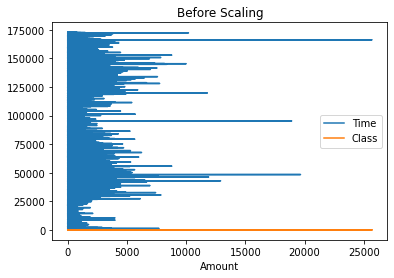

In [16]:
data_set.plot(x="Amount", y=["Time", "Class"])
plt.title("Before Scaling")
plt.savefig("Before Scaling")
plt.show()

In [17]:
#From the above plot we could see that features Amount and Time are not scaled

In [18]:
# Lets use the heatmap to find any correlations for the features.
#Correlation is a table that shows the relation 2 features. It helps to understand data more deeply. 
#With colors and heatmap chart it helps you to visualize and spot difference very efficiently.

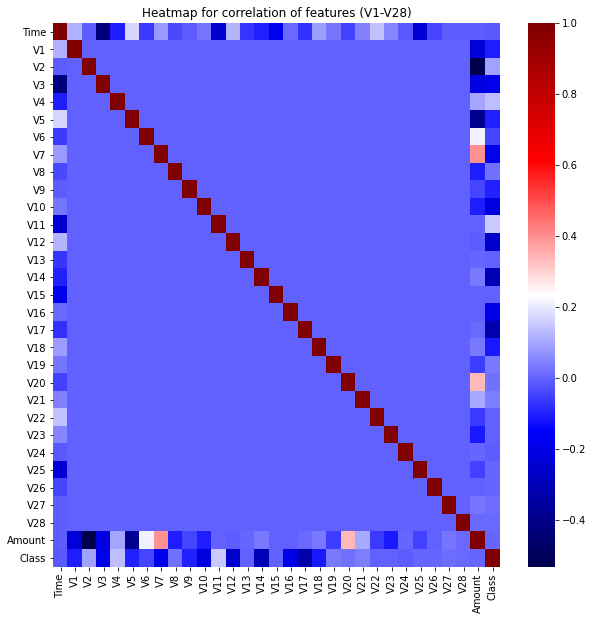

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(data_set.corr(), cmap="seismic")
plt.title("Heatmap for correlation of features (V1-V28)")
plt.savefig("HeatMap for correlations of features (V1-V28)")
plt.show()

In [20]:
# From this heat map, we can see the highest correlations are observed between Time & V3[<-0.4], Amount & V2[<-0.4], Amount & V4[0.19]
# Also from this heat map, features V1-V28 somehow have close inter-connection with each other.
# But class feature has some positive and negative correlation with all V-features, whereas it doesnot have any correlation with
# the Feature Time and Amount.

In [21]:
# From the above correlation, it clearly indicates that all V-features scaled, but [Time and Amount] isn't scaled.
# So scaling them is first priority.
# Then once its scaled, they have to be dropped from the dataset.
# Then we can move forward for either oversampling/undersampling.

In [22]:
# We are using MinMax scaler to scale the two features Amount and Time based on the minimum and maximum value.
# From the above plot we clearly saw the amount ranges between [0-25000], whereas Time ranges between [0-175000]
# To undermine this data, we thought of a way to eliminate the median values, instead consider the minimum and maximum values of the dataset.

In [23]:
minmax_scale = MinMaxScaler()

data_set['scaled_amount']=minmax_scale.fit_transform(data_set['Amount'].values.reshape(-1,1))
data_set['scaled_Time']=minmax_scale.fit_transform(data_set['Time'].values.reshape(-1,1))

data_set.drop(['Amount','Time'], axis=1,inplace=True)

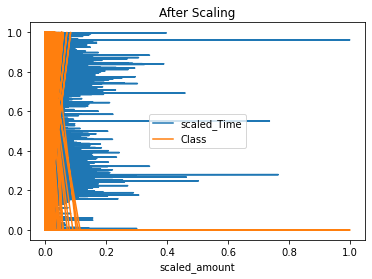

In [24]:
data_set.plot(x="scaled_amount", y=["scaled_Time", "Class"])
plt.title("After Scaling")
plt.savefig("After Scaling")
plt.show()

In [25]:
# So now, this looks good we have both the features [Time and Amount] in range between [0-1].

In [26]:
# Lets see the new heatmap to after scaling the features time and amount.

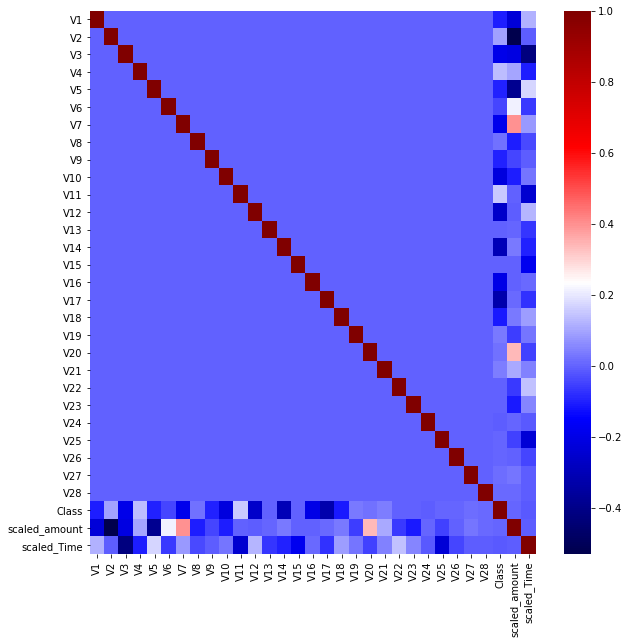

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(data_set.corr(), cmap="seismic")
plt.savefig("HeatMap for correlations after scaling[Time and Amount]")
plt.show()

In [28]:
# After scaling the Data lets move ahead with Handling the imbalanced data
# That means we can move ahead for Sampling techniques.
# But in our case, we have 492 fraud cases and 284315 genuine cases.
# In our opinion, undersampling would be much easier and feasible.
#Undersampling is a technique to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class. 
#It is one of several techniques data scientists can use to extract more accurate information from originally imbalanced datasets.

# Random undersampling

In [29]:
# First, we will shuffle the whole dataset with random state=4
# Extract fraud ones onto a different dataset fraud_dataset
# In the fraud we have 492 observations.
# Now we have to select 492 random observations from 284315 genuine observations as non_fraud_dataset.
# Then concat both fraud_dataset and non_fraud_dataset into normalized one.

In [30]:
# Shuffle the Dataset.
shuffled_data_set = data_set.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
fraud_data_set = shuffled_data_set.loc[shuffled_data_set['Class'] == 1]

#Randomly select 492 observations from the genuine (majority class)
genuine_data_set = shuffled_data_set.loc[shuffled_data_set['Class'] == 0].sample(n=492,random_state=42)

# Concatenate both dataframes again
normalized_data_set = pd.concat([fraud_data_set, genuine_data_set])

# NearMiss undersampling

In [31]:
# Drop class column from dataset and label it as feature matrix.
X_for_nearmiss = data_set.drop(columns='Class', axis=1)
# Label class column from dataset as target vector.
Y_for_nearmiss = data_set['Class']

In [32]:
# Fit the target vector and feature matrix.
nearmiss = NearMiss(version=2)
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X_for_nearmiss, Y_for_nearmiss)

Before NearMiss undersampling


TypeError: savefig() missing 1 required positional argument: 'fname'

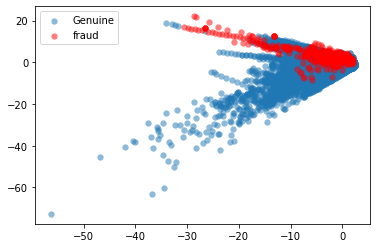

In [33]:
# A scatter plot to distinguish the genuine and fraud data
def scatter_plotting(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Genuine", alpha=0.5, linewidth=0.2)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="fraud", alpha=0.5, linewidth=0.2, c='r')
    plt.legend()
    return plt.show()

print('Before NearMiss undersampling')
scatter_plotting(X_for_nearmiss.values, Y_for_nearmiss)

In [ ]:
def data_counter(data):
    fraud = 0
    genuine = 0
    for i in data:
        if i == 1:
            fraud = fraud + 1
        else:
            genuine = genuine + 1
    return fraud, genuine

In [ ]:
# After undersampling
# 0 = Genuine
# 1 = fraud
fraud_counter_nearmiss, genuine_counter_nearmiss = data_counter(y_nearmiss)
print('Total number of samples after undersampling =', len(y_nearmiss))
print(' - number of fraud data =', fraud_counter_nearmiss)
print(' - number of Genuine data =', genuine_counter_nearmiss)

print('After NearMiss undersampling')
scatter_plotting(X_nearmiss.values, y_nearmiss)

# we can see that samples from the majority class that were furthest where removed

In [ ]:
# Lets see a sns plot between fraud and genuine transactions after scaling Time and amount

In [ ]:
sns.countplot(x = "Class", data = normalized_data_set)
plt.title("Balanced Classes after Random UnderSampling ")
plt.savefig("After Random UnderSampling")
plt.show()

In [ ]:
normalized_data_set.describe()

In [ ]:
# Now that we have the dataset, lets start creating the target column Y and feature column X
# Class is considered as the target

In [ ]:
X = normalized_data_set.drop(columns='Class', axis=1)
y = normalized_data_set['Class']

In [ ]:
print("X=",X)
print("Y=",y)

# Splitting data into training and testing sets

#### splitting data using simple undersampling data

In [ ]:
# Split the data for X_train,X_test,y_train,y_test with test_size and random state
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

#### splitting data using NearMiss data

In [ ]:
X_train_nm,X_test_nm,y_train_nm,y_test_nm = train_test_split(X_nearmiss, y_nearmiss, test_size=0.3, random_state=42)

In [ ]:
# Convert all the above generated to array for input to algorithms for easy task.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train_nm = X_train_nm.values
X_test_nm = X_test_nm.values
y_train_nm = y_train_nm.values
y_test_nm = y_test_nm.values

# Let's start with the models and algorithms.

### k nearest neighbor

In [ ]:
def knn_classifier(X_train, y_train, X_test, y_test):
    # 1. KNeighborsClassifier with k as an input to the classifier.
    k = 3
    knn_algorithm = KNeighborsClassifier(n_neighbors=k)
    knn_algorithm.fit(X_train, y_train)
    
    y_predict_knn = knn_algorithm.predict(X_test)
    y_predict_probab_knn = knn_algorithm.predict_proba(X_test)
    knn_accuracy = accuracy_score(y_test, y_predict_knn)
    pre_knn = precision_score(y_test,y_predict_knn)
    recall_knn = recall_score(y_test,y_predict_knn)
    f1_knn = f1_score(y_test,y_predict_knn)
    
    return knn_algorithm, y_predict_knn, y_predict_probab_knn, knn_accuracy, pre_knn, recall_knn, f1_knn

In [ ]:
knn_algorithm, y_predict_knn, y_predict_probab_knn, knn_accuracy, pre_knn, recall_knn, f1_knn = knn_classifier(X_train, y_train, X_test, y_test)
print("Accuracy score for KNN=",knn_accuracy*100)
print("Precision score for KNN=",pre_knn*100)
print("Recall score for KNN=",recall_knn*100)
print("F1 score for KNN=",f1_knn*100)

In [ ]:
# using NearMiss data set
knn_algorithm_NM, y_predict_knn_NM, y_predict_probab_knn_NM, knn_accuracy_NM, pre_knn_NM, recall_knn_NM, f1_knn_NM = knn_classifier(X_train_nm, y_train_nm, X_test_nm, y_test_nm)
print("Accuracy score for KNN=",knn_accuracy_NM*100)
print("Precision score for KNN=",pre_knn_NM*100)
print("Recall score for KNN=",recall_knn_NM*100)
print("F1 score for KNN=",f1_knn_NM*100)

### Decision Tree

In [ ]:
def decisiontree_classifier(X_train, y_train, X_test, y_test):
    # 2. Decision Tree Classifier
    decisiontree_algorithm = DecisionTreeClassifier()
    decisiontree_algorithm.fit(X_train, y_train)

    y_predict_dt = decisiontree_algorithm.predict(X_test)
    y_predict_probab_dt = decisiontree_algorithm.predict_proba(X_test)
    dt_accuracy = accuracy_score(y_test, y_predict_dt)
    pre_dt = precision_score(y_test,y_predict_dt)
    recall_dt = recall_score(y_test,y_predict_dt)
    f1_dt = f1_score(y_test,y_predict_dt)
    
    return decisiontree_algorithm, y_predict_dt, y_predict_probab_dt, dt_accuracy, pre_dt, recall_dt, f1_dt

In [ ]:
decisiontree_algorithm, y_predict_dt, y_predict_probab_dt, dt_accuracy, pre_dt, recall_dt, f1_dt = decisiontree_classifier(X_train, y_train, X_test, y_test)
print("Accuracy score for KNN=",dt_accuracy*100)
print("Precision score for KNN=",pre_dt*100)
print("Recall score for KNN=",recall_dt*100)
print("F1 score for KNN=",f1_dt*100)

In [ ]:
decisiontree_algorithm_NM, y_predict_dt_NM, y_predict_probab_dt_NM, dt_accuracy_NM, pre_dt_NM, recall_dt_NM, f1_dt_NM = decisiontree_classifier(X_train_nm, y_train_nm, X_test_nm, y_test_nm)
print("Accuracy score for KNN=",dt_accuracy_NM*100)
print("Precision score for KNN=",pre_dt_NM*100)
print("Recall score for KNN=",recall_dt_NM*100)
print("F1 score for KNN=",f1_dt_NM*100)

### Random Forest

In [ ]:
def randomForestClassifier(X_train, y_train, X_test, y_test):
    # 3. Random Forest Classifier
    # Here we will use the random state that's already used while splitting the dataset
    randomForest_algorithm = RandomForestClassifier(n_estimators=19, bootstrap = True, random_state=42)
    randomForest_algorithm.fit(X_train, y_train)
    
    y_predict_rf = randomForest_algorithm.predict(X_test)
    y_predict_probab_rf = randomForest_algorithm.predict_proba(X_test)
    rf_accuracy = accuracy_score(y_test,y_predict_rf)
    pre_rf = precision_score(y_test,y_predict_rf)
    recall_rf = recall_score(y_test,y_predict_rf)
    f1_rf = f1_score(y_test,y_predict_rf)
    
    return randomForest_algorithm, y_predict_rf, y_predict_probab_rf, rf_accuracy, pre_rf, recall_rf, f1_rf

In [ ]:
randomForest_algorithm, y_predict_rf, y_predict_probab_rf, rf_accuracy, pre_rf, recall_rf, f1_rf = randomForestClassifier(X_train, y_train, X_test, y_test)
print("Accuracy score for Random Forest Classifier=",rf_accuracy*100)
print("Precision score for Random Forest=",pre_rf*100)
print("Recall score for Random Forest=",recall_rf*100)
print("F1 score for Random Forest=",f1_rf*100)

In [ ]:
randomForest_algorithm_NM, y_predict_rf_NM, y_predict_probab_rf_NM, rf_accuracy_NM, pre_rf_NM, recall_rf_NM, f1_rf_NM = randomForestClassifier(X_train_nm, y_train_nm, X_test_nm, y_test_nm)
print("Accuracy score for Random Forest Classifier=",rf_accuracy_NM*100)
print("Precision score for Random Forest=",pre_rf_NM*100)
print("Recall score for Random Forest=",recall_rf_NM*100)
print("F1 score for Random Forest=",f1_rf_NM*100)

 ### Logistic Regression

In [ ]:
def  logisticRegressionClassifier(X_train, y_train, X_test, y_test):
    # 4. Logistic Regression
    logreg_algorithm = LogisticRegression(solver='liblinear')
    logreg_algorithm.fit(X_train, y_train)
    
    y_predict_lr = logreg_algorithm.predict(X_test)
    y_predict_probab_lr = logreg_algorithm.predict_proba(X_test)
    lr_accuracy = accuracy_score(y_test, y_predict_lr)
    pre_lr = precision_score(y_test,y_predict_lr)
    recall_lr = recall_score(y_test,y_predict_lr)
    f1_lr = f1_score(y_test,y_predict_lr)
    return logreg_algorithm, y_predict_lr, y_predict_probab_lr, lr_accuracy, pre_lr, recall_lr, f1_lr

In [ ]:
logreg_algorithm, y_predict_lr, y_predict_probab_lr, lr_accuracy, pre_lr, recall_lr, f1_lr = logisticRegressionClassifier(X_train, y_train, X_test, y_test)
print("Accuracy score for Logistic Regression=",lr_accuracy*100)
print("Precision score for Logistic Regression=",pre_lr*100)
print("Recall score for Logistic Regression=",recall_lr*100)
print("F1 score for Logistic Regression =",f1_lr*100)

In [ ]:
logreg_algorithm_NM, y_predict_lr_NM, y_predict_probab_lr_NM, lr_accuracy_NM, pre_lr_NM, recall_lr_NM, f1_lr_NM = logisticRegressionClassifier(X_train_nm, y_train_nm, X_test_nm, y_test_nm)
print("Accuracy score for Logistic Regression=",lr_accuracy_NM*100)
print("Precision score for Logistic Regression=",pre_lr_NM*100)
print("Recall score for Logistic Regression=",recall_lr_NM*100)
print("F1 score for Logistic Regression =",f1_lr_NM*100)

### Artificial Neural Network

In [ ]:
def ANN_Classifier(X_train, y_train, X_test, y_test):
    # 5. Artificial Neural Network
    # 1 Hidden Layer with 200 neurons:
    ANN_Algorithm = MLPClassifier(hidden_layer_sizes=(200), activation= 'logistic', 
                           solver='sgd', alpha=1e-5, random_state=1, 
                           learning_rate_init = 0.1, max_iter=10000, verbose=True, tol=0.0001)
    ANN_Algorithm.fit(X_train, y_train)
    # Weights:
    print(ANN_Algorithm.coefs_)
    # The ith element in the list represents the weight matrix corresponding to layer i.
    print('\n')
    # Bias weights:
    print(ANN_Algorithm.intercepts_)
    # The ith element in the list represents the bias vector corresponding to layer i + 1.
    # Testing on the testing set:
    y_predict_ann = ANN_Algorithm.predict(X_test)
    y_predict_probab_ann = ANN_Algorithm.predict_proba(X_test)
    print(y_predict_ann)
    ann_accuracy = accuracy_score(y_test, y_predict_ann)
    pre_ann = precision_score(y_test,y_predict_ann)
    recall_ann = recall_score(y_test,y_predict_ann)
    f1_ann = f1_score(y_test,y_predict_ann)
    
    return ANN_Algorithm, y_predict_ann, y_predict_probab_ann, ann_accuracy, pre_ann, recall_ann, f1_ann

In [ ]:
ANN_Algorithm, y_predict_ann, y_predict_probab_ann, ann_accuracy, pre_ann, recall_ann, f1_ann = ANN_Classifier(X_train, y_train, X_test, y_test)
print("Accuracy score for Artificial Neural Network=",ann_accuracy*100)
print("Precision score for Artificial Neural Network=",pre_ann*100)
print("Recall score for Artificial Neural Network=",recall_ann*100)
print("F1 score for Artificial Neural Network=",f1_ann*100)

In [ ]:
ANN_Algorithm_NM, y_predict_ann_NM, y_predict_probab_ann_NM, ann_accuracy_NM, pre_ann_NM, recall_ann_NM, f1_ann_NM = ANN_Classifier(X_train_nm, y_train_nm, X_test_nm, y_test_nm)
print("Accuracy score for Artificial Neural Network=",ann_accuracy_NM*100)
print("Precision score for Artificial Neural Network=",pre_ann_NM*100)
print("Recall score for Artificial Neural Network=",recall_ann_NM*100)
print("F1 score for Artificial Neural Network=",f1_ann_NM*100)

### Naive Bayes

In [ ]:
def naiveBayesClassifier(X_train, y_train, X_test, y_test):
    # 6. Naive Bayes
    naiveBayes_algorithm = GaussianNB()
    naiveBayes_algorithm.fit(X_train, y_train)
    
    y_predict_naiveBayes  =  naiveBayes_algorithm.predict(X_test)
    y_predict_probab_naiveBayes = naiveBayes_algorithm.predict_proba(X_test)
    naiveBayes_accuracy = accuracy_score(y_test, y_predict_naiveBayes)
    pre_nb = precision_score(y_test,y_predict_naiveBayes)
    recall_nb = recall_score(y_test,y_predict_naiveBayes)
    f1_nb = f1_score(y_test,y_predict_naiveBayes)
    
    return naiveBayes_algorithm, y_predict_naiveBayes, y_predict_probab_naiveBayes, naiveBayes_accuracy, pre_nb, recall_nb, f1_nb

In [ ]:
naiveBayes_algorithm, y_predict_naiveBayes, y_predict_probab_naiveBayes, naiveBayes_accuracy, pre_nb, recall_nb, f1_nb = naiveBayesClassifier(X_train, y_train, X_test, y_test)
print("Accuracy score for Naive Bayes model = ", naiveBayes_accuracy*100)
print("Precision score for Naive Bayes=",pre_nb*100)
print("Recall score for Naive Bayes=",pre_nb*100)
print("F1 score for Naive Bayes=",f1_nb*100)

In [ ]:
naiveBayes_algorithm_NM, y_predict_naiveBayes_NM, y_predict_probab_naiveBayes_NM, naiveBayes_accuracy_NM, pre_nb_NM, recall_nb_NM, f1_nb_NM = naiveBayesClassifier(X_train_nm, y_train_nm, X_test_nm, y_test_nm)
print("Accuracy score for Naive Bayes model = ", naiveBayes_accuracy_NM*100)
print("Precision score for Naive Bayes=",pre_nb_NM*100)
print("Recall score for Naive Bayes=",pre_nb_NM*100)
print("F1 score for Naive Bayes=",f1_nb_NM*100)

### Support Vector Machine

In [ ]:
def svmClassifier(X_train, y_train, X_test, y_test):
    #7. Support Vector Machine Classifier
    svm_algorithm = SVC(kernel='rbf', probability=True, random_state = 1)
    svm_algorithm.fit(X_train, y_train)
    y_predict_svm = svm_algorithm.predict(X_test)
    y_predict_probab_svm = svm_algorithm.predict_proba(X_test)
    svm_accuracy = accuracy_score(y_test, y_predict_svm)
    pre_svm = precision_score(y_test,y_predict_svm)
    recall_svm = recall_score(y_test,y_predict_svm)
    f1_svm = f1_score(y_test,y_predict_svm)
    return svm_algorithm, y_predict_svm, y_predict_probab_svm, svm_accuracy, pre_svm, recall_svm, f1_svm

In [ ]:
svm_algorithm, y_predict_svm, y_predict_probab_svm, svm_accuracy, pre_svm, recall_svm, f1_svm = svmClassifier(X_train, y_train, X_test, y_test)
print("Accuracy score for Support Vector Machine = ", svm_accuracy*100)
print("Precision score for Support Vector Machine=",pre_svm*100)
print("Recall score for Support Vector Machine=",recall_svm*100)
print("F1 score for Support Vector Machine=",f1_svm*100)

In [ ]:
svm_algorithm_NM, y_predict_svm_NM, y_predict_probab_svm_NM, svm_accuracy_NM, pre_svm_NM, recall_svm_NM, f1_svm_NM = svmClassifier(X_train_nm, y_train_nm, X_test_nm, y_test_nm)
print("Accuracy score for Support Vector Machine = ", svm_accuracy_NM*100)
print("Precision score for Support Vector Machine=",pre_svm_NM*100)
print("Recall score for Support Vector Machine=",recall_svm_NM*100)
print("F1 score for Support Vector Machine=",f1_svm_NM*100)

# Plot ROC Curve with AUC

In [ ]:
### ROC Zoomed Plot ###

In [ ]:
def ROC_AUC(filetitle, isZoom, y_test, y_predict_probab_knn, y_predict_probab_dt, y_predict_probab_rf, y_predict_probab_lr, y_predict_probab_ann, y_predict_probab_naiveBayes, y_predict_probab_svm):
    # ROC Curve for all 7 - models
    # For KNN
    fpr1, tpr1, thresh1 = roc_curve(y_test, y_predict_probab_knn[:,1], pos_label=1)
    # For Decision Tree
    fpr2, tpr2, thresh2 = roc_curve(y_test, y_predict_probab_dt[:,1], pos_label=1)
    # For Random Forest
    fpr3, tpr3, thresh3 = roc_curve(y_test, y_predict_probab_rf[:,1], pos_label=1)
    # For Logistic Regression
    fpr4, tpr4, thresh4 = roc_curve(y_test, y_predict_probab_lr[:,1], pos_label=1)
    # For Artificial Neural Network
    fpr5, tpr5, thresh5 = roc_curve(y_test, y_predict_probab_ann[:,1], pos_label=1)
    # For Naive Bayes
    fpr6, tpr6, thresh6 = roc_curve(y_test, y_predict_probab_naiveBayes[:,1], pos_label=1)
    # For Support Vector Machine
    fpr7, tpr7, thresh7 = roc_curve(y_test, y_predict_probab_svm[:,1], pos_label=1)

    # AUC for all 7 - models

    # For KNN
    AUC_KNN = metrics.auc(fpr1, tpr1)
    # For Decision Tree
    AUC_dt = metrics.auc(fpr2, tpr2)
    # For Random Forest
    AUC_rf = metrics.auc(fpr3, tpr3)
    # For Logistic Regression
    AUC_lr = metrics.auc(fpr4, tpr4)
    # For Artificial Neural Network
    AUC_ann = metrics.auc(fpr5, tpr5)
    # For Naive Bayes
    AUC_nb = metrics.auc(fpr6, tpr6)
    # For Support Vector Machine
    AUC_svm = metrics.auc(fpr7, tpr7)

    print("AUC KNN: " + str(AUC_KNN))
    print("AUC Decision Tree: " + str(AUC_dt))
    print("AUC Random Forest: " + str(AUC_rf))
    print("AUC Logistic Regression: " + str(AUC_lr))
    print("AUC Artificial Neural Network: " + str(AUC_ann))
    print("AUC Naive Bayes: " + str(AUC_nb))
    print("AUC Support Vector Machine: " + str(AUC_svm))

    %matplotlib inline
    plt.style.use('seaborn')
    plt.figure()
    # Curve for KNN
    plt.plot(fpr1, tpr1, color='red', lw=1, linestyle=':', label='ROC KNN (AUC = %0.3f)' % AUC_KNN)
    # Curve for Decision Tree
    plt.plot(fpr2, tpr2, color='green', lw=1, linestyle='--', label='ROC Decision Tree (AUC = %0.3f)' % AUC_dt)
    # Curve for Random Forest
    plt.plot(fpr3, tpr3, color='blue', lw=1, linestyle='--', label='ROC Random Forest (AUC = %0.3f)' % AUC_rf)
    # Curve for Logistic Regression
    plt.plot(fpr4, tpr4, color='darkorange', lw=2, label='ROC Logistic Regression (AUC = %0.3f)' % AUC_lr)
    # Curve for Artificial Neural Network
    plt.plot(fpr5, tpr5, color='aqua', lw=2, label='ROC Artificial Neural Network (AUC = %0.3f)' % AUC_ann)
    # Curve for Naive Bayes
    plt.plot(fpr6, tpr6, color='cornflowerblue', lw=2, label='ROC Naive Bayes (AUC = %0.3f)' % AUC_nb)
    # Curve for Support Vector Machine
    plt.plot(fpr7, tpr7, color='deeppink', lw=1, linestyle=':',  label='ROC Support Vector Machine (AUC = %0.3f)' % AUC_svm)

    # Random Guess line:
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    
    type_ = ''
    if isZoom == True:
        # Defining The Range of X-Axis and Y-Axis:
        plt.xlim([-0.04, 0.4])
        plt.ylim([0.5, 1])
        type_ = 'zoomed'
    else:
        plt.xlim([-0.04, 1.009])
        plt.ylim([0.0, 1.03])

    # Labels, Title, Legend:
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig(('ROC'+filetitle+type_),dpi=100)
    plt.show()

In [ ]:
ROC_AUC('random', False, y_test, y_predict_probab_knn, y_predict_probab_dt, y_predict_probab_rf, y_predict_probab_lr, y_predict_probab_ann, y_predict_probab_naiveBayes, y_predict_probab_svm)

In [ ]:
ROC_AUC('random', True,y_test, y_predict_probab_knn, y_predict_probab_dt, y_predict_probab_rf, y_predict_probab_lr, y_predict_probab_ann, y_predict_probab_naiveBayes, y_predict_probab_svm)

In [ ]:
ROC_AUC('nearmiss', True,y_test_nm, y_predict_probab_knn_NM, y_predict_probab_dt_NM, y_predict_probab_rf_NM, y_predict_probab_lr_NM, y_predict_probab_ann_NM, y_predict_probab_naiveBayes_NM, y_predict_probab_svm_NM)

In [ ]:
ROC_AUC('nearmiss', False, y_test_nm, y_predict_probab_knn_NM, y_predict_probab_dt_NM, y_predict_probab_rf_NM, y_predict_probab_lr_NM, y_predict_probab_ann_NM, y_predict_probab_naiveBayes_NM, y_predict_probab_svm_NM)

# Finding confusion matrix and plotting for all 7-algorithms in 2-subplots

In [ ]:
# 1st subplot containing KNN, DecisionTree, RandomForest, LogisticRegression #

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
classifiers = [knn_algorithm, decisiontree_algorithm,randomForest_algorithm,logreg_algorithm]
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, X_test, y_test, ax=ax, cmap='Blues')
    ax.title.set_text(type(cls).__name__)

plt.savefig('Confusion Matrix for first 4-algorithms',dpi=100)
plt.tight_layout()  
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
classifiers = [knn_algorithm_NM, decisiontree_algorithm_NM, randomForest_algorithm_NM, logreg_algorithm_NM]
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, X_test_nm, y_test_nm, ax=ax, cmap='Blues')
    ax.title.set_text(type(cls).__name__)

plt.savefig('Confusion Matrix for first 4-algorithms (NearMiss)',dpi=100)
plt.tight_layout()  
plt.show()

In [ ]:
# 2nd subplot containing ANN_Algorithm, naiveBayes_algorithm, svm_algorithm #

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
classifiers = [ANN_Algorithm, naiveBayes_algorithm, svm_algorithm]
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, X_test, y_test, ax=ax, cmap='Blues')
    ax.title.set_text(type(cls).__name__)

plt.savefig('Confusion Matrix for last 3-algorithms',dpi=100)
plt.tight_layout()  
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
classifiers = [ANN_Algorithm_NM, naiveBayes_algorithm_NM, svm_algorithm_NM]
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, X_test_nm, y_test_nm, ax=ax, cmap='Blues')
    ax.title.set_text(type(cls).__name__)

plt.savefig('Confusion Matrix for last 3-algorithms (NearMiss)',dpi=100)
plt.tight_layout()  
plt.show()

# Summary: Scores

In [ ]:
print("Accuracy score for KNN=",knn_accuracy*100)
print("Accuracy score for Decision Tree=",dt_accuracy*100)
print("Accuracy score for Random Forest Classifier=",rf_accuracy*100)
print("Accuracy score for Logistic Regression=",lr_accuracy*100)
print("Accuracy score for Artificial Neural Network=",ann_accuracy*100)
print("Accuracy score for Naive Bayes model = ", naiveBayes_accuracy*100)
print("Accuracy score for Support Vector Machine = ", svm_accuracy*100)

In [ ]:
table_AccuracyScore = [
    ['dataset used', 'KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Artificial Neural Network', 'Naive Bayes', 'SVM'], 
    ['random undersampling', str(knn_accuracy*100), str(dt_accuracy*100), str(rf_accuracy*100), str(lr_accuracy*100), str(ann_accuracy*100), str(naiveBayes_accuracy*100), str(svm_accuracy*100)],
    ['NearMiss undersampling', str(knn_accuracy_NM*100), str(dt_accuracy_NM*100), str(rf_accuracy_NM*100), str(lr_accuracy_NM*100), str(ann_accuracy_NM*100), str(naiveBayes_accuracy_NM*100), str(svm_accuracy_NM*100)]
]
print('Accuracy Score')
print(tabulate(table_AccuracyScore, headers='firstrow', tablefmt='fancy_grid'))

In [ ]:
print("Precision score for KNN=",pre_knn*100)
print("Precision score for Decision Tree =",pre_dt*100)
print("Precision score for Random Forest=",pre_rf*100)
print("Precision score for Logistic Regression=",pre_lr*100)
print("Precision score for Artificial Neural Network=",pre_ann*100)
print("Precision score for Naive Bayes=",pre_nb*100)
print("Precision score for Support Vector Machine=",pre_svm*100)

In [ ]:
table_PrecisionScore = [
    ['dataset used', 'KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Artificial Neural Network', 'Naive Bayes', 'SVM'], 
    ['random undersampling', str(pre_knn*100), str(pre_dt*100), str(pre_rf*100), str(pre_lr*100), str(pre_ann*100), str(pre_nb*100), str(pre_svm*100)],
    ['NearMiss undersampling', str(pre_knn_NM*100), str(pre_dt_NM*100), str(pre_rf_NM*100), str(pre_lr_NM*100), str(pre_ann_NM*100), str(pre_nb_NM*100), str(pre_svm_NM*100)]
]
print('Precision Score')
print(tabulate(table_PrecisionScore, headers='firstrow', tablefmt='fancy_grid'))

In [ ]:
print("Recall score for KNN=",recall_knn*100)
print("Recall score for Decision Tree =",recall_dt*100)
print("Recall score for Random Forest=",recall_rf*100)
print("Recall score for Logistic Regression=",recall_lr*100)
print("Recall score for Artificial Neural Network=",recall_ann*100)
print("Recall score for Naive Bayes=",recall_nb*100)
print("Recall score for Support Vector Machine=",recall_svm*100)

In [ ]:
table_RecallScore = [
    ['dataset used', 'KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Artificial Neural Network', 'Naive Bayes', 'SVM'], 
    ['random undersampling', str(recall_knn*100), str(recall_dt*100), str(recall_rf*100), str(recall_lr*100), str(recall_ann*100), str(recall_nb*100), str(recall_svm*100)],
    ['NearMiss undersampling', str(recall_knn_NM*100), str(recall_dt_NM*100), str(recall_rf_NM*100), str(recall_lr_NM*100), str(recall_ann_NM*100), str(recall_nb_NM*100), str(recall_svm_NM*100)]
]
print('Recall Score')
print(tabulate(table_RecallScore, headers='firstrow', tablefmt='fancy_grid'))

In [ ]:
print("F1 score for KNN=",f1_knn*100)
print("F1 score for Decision Tree =",f1_dt*100)
print("F1 score for Random Forest=",f1_rf*100)
print("F1 score for Logistic Regression=",f1_lr*100)
print("F1 score for Artificial Neural Network=",f1_ann*100)
print("F1 score for Naive Bayes=",f1_nb*100)
print("F1 score for Support Vector Machine=",f1_svm*100)

In [ ]:
table_F1Score = [
    ['dataset used', 'KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Artificial Neural Network', 'Naive Bayes', 'SVM'], 
    ['random undersampling', str(f1_knn*100), str(f1_dt*100), str(f1_rf*100), str(f1_lr*100), str(f1_ann*100), str(f1_nb*100), str(f1_svm*100)],
    ['NearMiss undersampling', str(f1_knn_NM*100), str(f1_dt_NM*100), str(f1_rf_NM*100), str(f1_lr_NM*100), str(f1_ann_NM*100), str(f1_nb_NM*100), str(f1_svm_NM*100)]
]
print('F1-Score')
print(tabulate(table_F1Score, headers='firstrow', tablefmt='fancy_grid'))

In [ ]:
Image(url="randomundersampling.png", width=800, height=1000)

In [ ]:
Image(url="nearmiss.png", width=800, height=1000)

In [ ]:
# From this project we observed that with 284315 genuine cases, we have 492 fraudulent transactions. So anytime we get a database
# we shouldn't solely rely on database being optimized and scaled. This project made us understand the concepts behind handling 
# the database that involves normalizing, scaling the features amount and time with respect to class column and lastly under - 
# sampling the database by randomly choosing 492 genuine transactions among 284315 genuine ones, to pair up with fraud numbers.

# We have also used near miss undersampling for better accuracy.

# From CS-4661. we had learnt how to split the dataset based on target and features using random state and test-size.

# Then we started applying the algorithms in-order to find the accuracy levels.
# We have applied 7-algorithms, but in terms of accuracy we think the best was achieved via Artificial Neural Network as 95.27%

# In terms of ROC-AUC, we achieved the best in Random Forest as 98% as shown in diagram for Random undersampling approach. 
# For the NearMiss data balancing approach, we achieved the best in using both Random Forest and ANN with 99.9%, they came
# in a tie.

# We have also calculated Precision for both data balancing approaches for all 7-algorithms, the best result was observed in 
# Support Vector Machine as 97.80% using the random undersampling dataset. Using the NearMiss undersampling dataset, the best is
# Random Forest with 99.31%

# We have also calculated F1-score and Recall for all 7-algorithms, the best result was observed in Artificial Neural Network
# as 95.27% and 94% respectively for data balancing approach 1. For approach 2 the best results was Random Forest with 99.31 for 
# both recall and f1-score.


# We have also tried to visualize the precictive analytics like using the confusion matrix since that gives direct comparisons
# about values of True Positives, False Positives, True Negatives and False Negatives and we also did a plot of confusion matrix.

# Now we have 7-algorithms, but we need to choose one among the 7 that gives the best accuracy, precision, recall, ROC and F1-score.

# From the histogram above we observed that the best result was observed with ANN (Artificial Neural Network), with an accuracy 
# of 95.27%, precision of 96.57%, recall of 94%, ROC of 97.87% and F1-score of 95.27% using approach 1 (Random undersampling).

# If we use approach 2 (NearMiss) to balance our data the best result was observed with Random forest with an accuracy of 99.32%,
# precision of 99.31%, recall of 99.31%, ROC-AUC of 99.85, and F1-Score of 99.31.


# So, with this we conclude that for credit card fraud detection algorithm, the best suitable algorithm is ANN (Artificial Neural
# Network) if we use Random Undersampling to balance our data. If we use NearMiss to balance our data, we can conclude that the 
# best suitable algorithm is Random Forest.
